In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [53]:
df = pd.read_csv('IBM.csv')

In [54]:
df.columns

Index(['Unnamed: 0', 'Date', 'AdjClose', 'Open', 'High', 'Low', 'Close',
       'Volume', 'avg7', 'avg10', 'avg50', 'avg100', 'avg200', 'avg253',
       'SPD_OPEN/CLOSE', 'SPD_HIGH/LOW', 'Adj_Close_Returns', 'Close_Returns',
       'Log_Returns', 'pos_string', 'count_pos_string', 'macd', 'signal',
       'hist', 'MACD_1DAY_strategy', 'MACD_9DAY_strategy',
       'MACD_CONVERGENCE_strategy', 'RSI', 'RSI_strategy', 'OBV', 'OBV_EMA',
       'OBV_strategy', 'TSF', 'TSF_strategy', 'WILLR', 'WILLR_strategy',
       'STOCH_K', 'STOCH_D', 'STOCH_K_strategy', 'STOCH_D_strategy', 'EMA',
       'TEMA', 'upperband', 'middleband', 'lowerband', 'MOM', 'stok', 'stod',
       'ROC', 'CCI', 'direction'],
      dtype='object')

In [55]:
#df = df[['AdjClose','avg10','macd','RSI','WILLR','Open','High','Low','avg7','SPD_OPEN/CLOSE','SPD_HIGH/LOW','macd','OBV','TSF','stok','stod','EMA','TEMA','upperband','middleband','lowerband', 'MOM','ROC','CCI','Turning_line', 'Standard_line', 'ichimoku_span1', 'ichimoku_span2']]
df = df[['Date','Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]

In [56]:
"""def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0"""

'def classify(current, future):\n    if float(future) > float(current):\n        return 1\n    else:\n        return 0'

In [57]:
"""df['future'] = df['AdjClose'].shift(-1)
df['target'] = list(map(classify, df['AdjClose'], df['future']))
df.dropna(inplace=True)"""

"df['future'] = df['AdjClose'].shift(-1)\ndf['target'] = list(map(classify, df['AdjClose'], df['future']))\ndf.dropna(inplace=True)"

In [58]:
df

,Date,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,2000-02-22 00:00:00,-0.013423,63.637089,66.496437,-0.335971,45.072478,1.097119,27.644444,-138.613872,-1
1,2000-02-23 00:00:00,-0.020478,62.347153,65.919552,-0.600809,41.831586,-24.128062,1.683852,-118.918841,-1
2,2000-02-24 00:00:00,0.015963,63.350410,65.525404,-0.721425,45.135822,-19.177571,-14.069505,-100.000000,1
3,2000-02-25 00:00:00,-0.022884,61.917152,64.887600,-0.922037,41.508260,-12.635387,-18.647007,-118.987320,-1
4,2000-02-28 00:00:00,-0.032944,59.910568,64.264131,-1.228774,37.022123,-11.360558,-14.391172,-115.094355,-1
...,...,...,...,...,...,...,...,...,...,...
5526,2022-02-07 00:00:00,0.000656,135.606552,133.976187,1.741004,60.715850,85.397707,87.672840,-16.339192,1
5527,2022-02-08 00:00:00,-0.001604,135.389175,134.067093,1.742613,59.964191,82.592171,85.868432,-18.614277,-1
5528,2022-02-09 00:00:00,0.005604,136.149994,134.415890,1.784707,61.749090,84.798300,84.262726,-10.651630,1
5529,2022-02-10 00:00:00,-0.019506,133.520004,134.673618,1.587549,52.959537,71.975150,79.788540,-54.808644,-1


In [59]:
df['direction'].value_counts()

 1    2837
-1    2694
Name: direction, dtype: int64

In [60]:
"""df = df.drop('future',axis=1)"""

"df = df.drop('future',axis=1)"

In [61]:
"""df_norm = df
def normalizeandscale(df_norm):
    for col in df_norm.columns:
        if col != 'target':
            df_norm[col] = preprocessing.scale(df_norm[col].values)
            df_norm[col] = df_norm[col]/df_norm[col].abs().max()
    return df_norm"""

"df_norm = df\ndef normalizeandscale(df_norm):\n    for col in df_norm.columns:\n        if col != 'target':\n            df_norm[col] = preprocessing.scale(df_norm[col].values)\n            df_norm[col] = df_norm[col]/df_norm[col].abs().max()\n    return df_norm"

In [62]:
#normalizeandscale(df_norm)

In [63]:
df_norm = df[['Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]
for col in df_norm.columns:
        if col != 'direction':
            df_norm[col]=(df_norm[col].values-np.min(df_norm[col]))/(np.max(df_norm[col])-np.min(df_norm[col]))
            df_norm.dropna(inplace=True)
            preprocessing.scale(df_norm[col].values)

df_norm

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.550512,0.278869,0.297183,0.668280,0.480171,0.454819,0.594068,0.527332,-1
1,0.525532,0.267492,0.291928,0.650265,0.439629,0.315771,0.445075,0.594491,-1
2,0.654551,0.276340,0.288338,0.642061,0.480964,0.343059,0.354663,0.659003,1
3,0.517015,0.263700,0.282528,0.628415,0.435585,0.379122,0.328391,0.594257,-1
4,0.481398,0.246003,0.276848,0.607550,0.379465,0.386149,0.352817,0.607532,-1
...,...,...,...,...,...,...,...,...,...
5526,0.600357,0.913586,0.911892,0.809560,0.675863,0.919508,0.938584,0.944284,1
5527,0.592354,0.911669,0.912720,0.809669,0.666460,0.904043,0.928228,0.936526,-1
5528,0.617874,0.918379,0.915897,0.812532,0.688788,0.916204,0.919013,0.963678,1
5529,0.528975,0.895184,0.918245,0.799121,0.578835,0.845519,0.893334,0.813104,-1


In [64]:
df_norm.describe()

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
count,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000
mean,0.598496,0.510389,0.509771,0.696724,0.561506,0.642487,0.637090,0.778830,0.025854
std,0.058676,0.278603,0.287168,0.096822,0.150846,0.217731,0.219262,0.147006,0.999756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.573005,0.225007,0.215494,0.646436,0.457981,0.445260,0.433973,0.652578,-1.000000
50%,0.599042,0.549661,0.548117,0.701824,0.561634,0.646089,0.640713,0.782503,1.000000
75%,0.624979,0.760739,0.769011,0.757740,0.669886,0.844752,0.841120,0.915503,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df_norm.drop('AdjClose',axis = 1, inplace=True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
df_norm

,Log_Returns,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.550512,0.297183,0.668280,0.480171,0.454819,0.594068,0.527332,-1
1,0.525532,0.291928,0.650265,0.439629,0.315771,0.445075,0.594491,-1
2,0.654551,0.288338,0.642061,0.480964,0.343059,0.354663,0.659003,1
3,0.517015,0.282528,0.628415,0.435585,0.379122,0.328391,0.594257,-1
4,0.481398,0.276848,0.607550,0.379465,0.386149,0.352817,0.607532,-1
...,...,...,...,...,...,...,...,...
5526,0.600357,0.911892,0.809560,0.675863,0.919508,0.938584,0.944284,1
5527,0.592354,0.912720,0.809669,0.666460,0.904043,0.928228,0.936526,-1
5528,0.617874,0.915897,0.812532,0.688788,0.916204,0.919013,0.963678,1
5529,0.528975,0.918245,0.799121,0.578835,0.845519,0.893334,0.813104,-1


In [67]:
times= sorted(df_norm.index.values)
"""last20_pct=sorted(df_norm.index.values)[-int(0.2*len(times))]
validation_df_norm=df_norm[(df_norm.index>=last20_pct)]
df_norm=df_norm[(df_norm.index<last20_pct)]"""
last30_pct=sorted(df_norm.index.values)[-int(0.3*len(times))]
test=df_norm[(df_norm.index>=last30_pct)]
train=df_norm[(df_norm.index<last30_pct)]

In [68]:
train.drop('Log_Returns', axis = 1, inplace = True)
test.drop('Log_Returns', axis = 1, inplace = True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
train

,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.297183,0.668280,0.480171,0.454819,0.594068,0.527332,-1
1,0.291928,0.650265,0.439629,0.315771,0.445075,0.594491,-1
2,0.288338,0.642061,0.480964,0.343059,0.354663,0.659003,1
3,0.282528,0.628415,0.435585,0.379122,0.328391,0.594257,-1
4,0.276848,0.607550,0.379465,0.386149,0.352817,0.607532,-1
...,...,...,...,...,...,...,...
3867,0.757698,0.629746,0.396432,0.476164,0.499714,0.611024,-1
3868,0.755677,0.629619,0.432926,0.449080,0.475146,0.650436,1
3869,0.756241,0.642178,0.569788,0.509096,0.465960,0.827502,1
3870,0.758779,0.661948,0.651011,0.700533,0.543829,0.966300,1


## HPELM

In [70]:
X_train = np.array(train.iloc[:,:-1])
y_train = np.array(train.iloc[:,-1])

X_test = np.array(test.iloc[:,:-1])
y_test = np.array(test.iloc[:,-1])

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import random

In [72]:
random.seed(1234)

In [73]:
"""from hpelm import HPELM
import matplotlib.pyplot as plt
loss_train=[]
loss_test=[]
acc_train=[]
acc_test=[]

ranger = range(5,400,5)

for i in ranger:
    elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
    elm.add_neurons(i, "sigm") #tanh lavora peggio
    #elm.add_neurons(1, 'sigm')
    elm.train(X_train,y_train)
    y_predicted = elm.predict(X_train)
    y_predicted_test = elm.predict(X_test)
    y_pred = []
    for j in y_predicted:
        if j > np.mean(y_predicted):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred_test = []
    for j in y_predicted_test:
        if j > np.mean(y_predicted_test):
            y_pred_test.append(1)
        else:
            y_pred_test.append(-1)
    print(f'\n model with {i} neurons')
    print('accuracy train: ', accuracy_score(y_train, y_pred))
    print('accuracy test: ', accuracy_score(y_test, y_pred_test))
    print('loss train: ', log_loss(y_train, y_pred))
    print('loss test: ', log_loss(y_test, y_pred_test))

    loss_train.append(log_loss(y_train, y_pred))
    loss_test.append(log_loss(y_test, y_pred_test))

    acc_train.append(accuracy_score(y_train, y_pred))
    acc_test.append(accuracy_score(y_test, y_pred_test))"""

'from hpelm import HPELM\nimport matplotlib.pyplot as plt\nloss_train=[]\nloss_test=[]\nacc_train=[]\nacc_test=[]\n\nranger = range(5,400,5)\n\nfor i in ranger:\n    elm = HPELM(X_train.shape[1], 1,\'c\', batch = 24)\n    elm.add_neurons(i, "sigm") #tanh lavora peggio\n    #elm.add_neurons(1, \'sigm\')\n    elm.train(X_train,y_train)\n    y_predicted = elm.predict(X_train)\n    y_predicted_test = elm.predict(X_test)\n    y_pred = []\n    for j in y_predicted:\n        if j > np.mean(y_predicted):\n            y_pred.append(1)\n        else:\n            y_pred.append(-1)\n\n    y_pred_test = []\n    for j in y_predicted_test:\n        if j > np.mean(y_predicted_test):\n            y_pred_test.append(1)\n        else:\n            y_pred_test.append(-1)\n    print(f\'\n model with {i} neurons\')\n    print(\'accuracy train: \', accuracy_score(y_train, y_pred))\n    print(\'accuracy test: \', accuracy_score(y_test, y_pred_test))\n    print(\'loss train: \', log_loss(y_train, y_pred))\n  

In [74]:
"""plt.title('loss')
plt.plot(ranger,loss_train, label='train')
plt.plot(ranger,loss_test, label = 'test')"""

"plt.title('loss')\nplt.plot(ranger,loss_train, label='train')\nplt.plot(ranger,loss_test, label = 'test')"

In [75]:
"""plt.title('accuracy')
plt.plot(ranger,acc_train, label = 'train')
plt.plot(ranger,acc_test, label = 'test')"""

"plt.title('accuracy')\nplt.plot(ranger,acc_train, label = 'train')\nplt.plot(ranger,acc_test, label = 'test')"

In [76]:
from hpelm import HPELM

elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
elm.add_neurons(100, "sigm")
elm.train(X_train,y_train)

In [77]:
y_predicted = elm.predict(X_train)
y_predicted_test = elm.predict(X_test)

In [78]:
#If OTS > Mean (OTS), predicted trend is up (1) else down (0).
y_pred = []
for i in y_predicted:
    if i > np.mean(y_predicted):
        y_pred.append(1)
    elif i == np.mean(y_predicted):
        y_pred.append(0)
    else:
        y_pred.append(-1)

y_pred_test = []
for i in y_predicted_test:
    if i > np.mean(y_predicted_test):
        y_pred_test.append(1)
    elif i == np.mean(y_predicted):
        y_pred_test.append(0)
    else:
        y_pred_test.append(-1)

In [79]:
print('accuracy train: ', accuracy_score(y_train, y_pred))
print('accuracy test: ', accuracy_score(y_test, y_pred_test))

accuracy train:  0.8489152892561983
accuracy test:  0.8227848101265823


In [80]:
print('loss train: ', log_loss(y_train, y_pred))
print('loss test: ', log_loss(y_test, y_pred_test))

loss train:  5.218342580334955
loss test:  6.120873896858006


## Train

In [81]:
train_eval = pd.DataFrame(df['Log_Returns'])
train_eval.set_index(df.index)

,Log_Returns
0,-0.013423
1,-0.020478
2,0.015963
3,-0.022884
4,-0.032944
...,...
5526,0.000656
5527,-0.001604
5528,0.005604
5529,-0.019506


In [82]:
train_eval = train_eval.loc[:3871]

In [83]:
train_eval

,Log_Returns
0,-0.013423
1,-0.020478
2,0.015963
3,-0.022884
4,-0.032944
...,...
3867,-0.011214
3868,0.004220
3869,0.018743
3870,0.014450


In [84]:
train_eval['strat_hpelm'] = y_pred

In [85]:
train_eval['hpelm_Returns'] = train_eval['strat_hpelm']*train_eval['Log_Returns']

In [86]:
train_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns      1.858328e+00
hpelm_Returns    8.537661e+16
dtype: float64

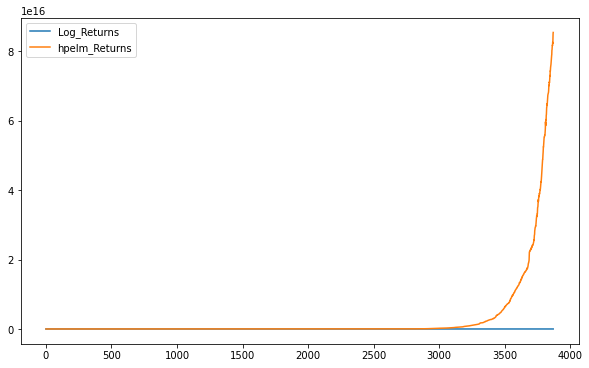

In [87]:
train_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Test

In [88]:
test_eval = pd.DataFrame(df['Log_Returns'])
test_eval.set_index(df.index)

,Log_Returns
0,-0.013423
1,-0.020478
2,0.015963
3,-0.022884
4,-0.032944
...,...
5526,0.000656
5527,-0.001604
5528,0.005604
5529,-0.019506


In [89]:
test_eval = test_eval.loc[3872:]

In [90]:
test_eval

,Log_Returns
3872,-0.000474
3873,0.014550
3874,0.008792
3875,0.004108
3876,-0.060383
...,...
5526,0.000656
5527,-0.001604
5528,0.005604
5529,-0.019506


In [91]:
test_eval['strat_hpelm'] = y_pred_test

In [92]:
test_eval['hpelm_Returns'] = test_eval['strat_hpelm']*test_eval['Log_Returns']

In [93]:
test_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns           1.107072
hpelm_Returns    684735.168253
dtype: float64

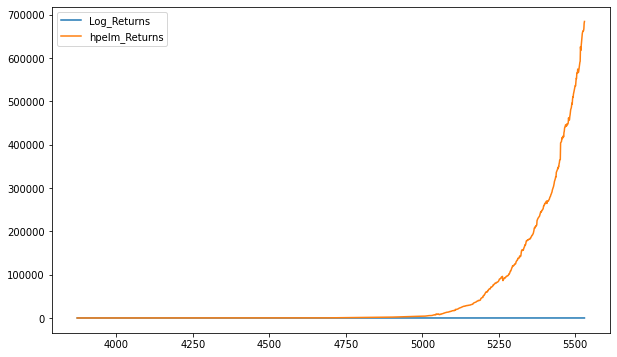

In [94]:
test_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [95]:
output = df[['Date','Log_Returns','AdjClose']]

In [96]:
output

,Date,Log_Returns,AdjClose
0,2000-02-22 00:00:00,-0.013423,63.637089
1,2000-02-23 00:00:00,-0.020478,62.347153
2,2000-02-24 00:00:00,0.015963,63.350410
3,2000-02-25 00:00:00,-0.022884,61.917152
4,2000-02-28 00:00:00,-0.032944,59.910568
...,...,...,...
5526,2022-02-07 00:00:00,0.000656,135.606552
5527,2022-02-08 00:00:00,-0.001604,135.389175
5528,2022-02-09 00:00:00,0.005604,136.149994
5529,2022-02-10 00:00:00,-0.019506,133.520004


In [97]:
output_test = pd.merge(output, test_eval, left_index = True, right_index=True)
output_test.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_test.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_test.set_index('Date', inplace=True)


In [98]:
output_train = pd.merge(output, train_eval, left_index = True, right_index=True)
output_train.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_train.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_train.set_index('Date', inplace=True)

In [99]:
output_train

,Log_Returns,strat_hpelm
Date,,
2000-02-22 00:00:00,-0.013423,-1
2000-02-23 00:00:00,-0.020478,1
2000-02-24 00:00:00,0.015963,1
2000-02-25 00:00:00,-0.022884,-1
2000-02-28 00:00:00,-0.032944,-1
...,...,...
2015-07-08 00:00:00,-0.011214,-1
2015-07-09 00:00:00,0.004220,-1
2015-07-10 00:00:00,0.018743,1


In [100]:
output_test

,Log_Returns,strat_hpelm
Date,,
2015-07-15 00:00:00,-0.000474,-1
2015-07-16 00:00:00,0.014550,1
2015-07-17 00:00:00,0.008792,1
2015-07-20 00:00:00,0.004108,1
2015-07-21 00:00:00,-0.060383,1
...,...,...
2022-02-07 00:00:00,0.000656,-1
2022-02-08 00:00:00,-0.001604,-1
2022-02-09 00:00:00,0.005604,1


In [101]:
output_train.to_csv('IBM_strategy_hpelm_train.csv')

In [102]:
output_test.to_csv('IBM_strategy_hpelm_test.csv')